# Data diri

Nama : Zein Rasyid Himami

Email : zeinrasyid18@gmail.com

Domisili : Kabupaten Bekasi

# Submission

Install the required library

In [1]:
pip install split-folders

Import library

In [4]:
from tensorflow import keras
from keras.models import load_model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from sklearn.metrics import classification_report, confusion_matrix

from google.colab import files

import zipfile, os, warnings, shutil#, splitfolders
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg

warnings.filterwarnings("ignore")
%matplotlib inline

Download data

In [5]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-10 23:28:37--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.62MB/s    in 57s     

2021-07-10 23:29:34 (5.44 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Extract data

In [6]:
#Zein

with zipfile.ZipFile('/tmp/rockpaperscissors.zip','r') as zip_ref:
  zip_ref.extractall('/tmp')

print(os.listdir('/tmp/rockpaperscissors'))

['rock', 'paper', 'rps-cv-images', 'README_rpc-cv-images.txt', 'scissors']


Remove unneeded file / directory

In [7]:
shutil.rmtree('/tmp/rockpaperscissors/rps-cv-images')

os.remove('/tmp/rockpaperscissors/README_rpc-cv-images.txt')

print(os.listdir('/tmp/rockpaperscissors'))

['rock', 'paper', 'scissors']


Augment train and val data

In [9]:
train_gen = ImageDataGenerator(rescale=1.255,
                               zoom_range=0.2,
                               rotation_range = 30,
                               shear_range=0.2,
                               vertical_flip=True,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               fill_mode='nearest',
                               validation_split=0.4
                               )
val_gen = ImageDataGenerator(rescale=1.255, validation_split=0.4)

train_ds = train_gen.flow_from_directory('/tmp/rockpaperscissors',
                                         target_size=(224,224),
                                         seed = 123,
                                         class_mode = 'categorical',
                                         subset='training',
                                         batch_size=131
                                         )

val_ds = val_gen.flow_from_directory('/tmp/rockpaperscissors',
                                     target_size=(224,224),
                                     seed = 123,
                                     class_mode = 'categorical',
                                     subset='validation',
                                     batch_size=131
                                     ) #shuffle=False

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Create model sequential

In [10]:
keras.backend.clear_session()

model = Sequential([
                           Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
                           MaxPooling2D(2, 2),
                           Conv2D(32, (3,3), activation='relu'),
                           MaxPooling2D(2,2),
                           Conv2D(64, (3,3), activation='relu'),
                           MaxPooling2D(2,2),
                           Conv2D(128, (3,3), activation='relu'),
                           MaxPooling2D(2,2),
                           Conv2D(256, (3,3), activation='relu'),
                           MaxPooling2D(2,2),                    
                           Flatten(),
                           Dense(512, activation='relu'),
                           Dense(3, activation='softmax')
                           ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       7

Define callbacks consisting of early stopping and reduce learning rate, then save the best model to Model.h5

In [11]:
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss',patience=3),
            keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, min_lr=1.5e-5),
            keras.callbacks.ModelCheckpoint("Model.h5",verbose=1,save_best_only=True)]

Compile and run the model

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(train_ds, epochs=14, callbacks=callbacks, verbose=1, validation_data=val_ds)

Epoch 1/14
11/11 [==============================] - 117s 9s/step - loss: 22.8011 - accuracy: 0.3221 - val_loss: 1.1111 - val_accuracy: 0.4371

Epoch 00001: val_loss improved from inf to 1.11108, saving model to Model.h5
Epoch 2/14
11/11 [==============================] - 96s 10s/step - loss: 1.0915 - accuracy: 0.4294 - val_loss: 0.7944 - val_accuracy: 0.7963

Epoch 00002: val_loss improved from 1.11108 to 0.79442, saving model to Model.h5
Epoch 3/14
11/11 [==============================] - 96s 9s/step - loss: 0.8568 - accuracy: 0.6398 - val_loss: 1.2445 - val_accuracy: 0.4291

Epoch 00003: val_loss did not improve from 0.79442
Epoch 4/14
11/11 [==============================] - 96s 9s/step - loss: 1.1748 - accuracy: 0.5330 - val_loss: 0.7171 - val_accuracy: 0.6602

Epoch 00004: val_loss improved from 0.79442 to 0.71714, saving model to Model.h5
Epoch 5/14
11/11 [==============================] - 99s 9s/step - loss: 0.7757 - accuracy: 0.6732 - val_loss: 0.3249 - val_accuracy: 0.8879

Ep

Get the best model

In [13]:
model = load_model("./Model.h5")

Evaluate the best model generally

In [14]:
model.evaluate(val_ds)

7/7 [==============================] - 15s 2s/step - loss: 0.0459 - accuracy: 0.9874


[0.045861586928367615, 0.9874141812324524]

Visualize the accuracy and loss 

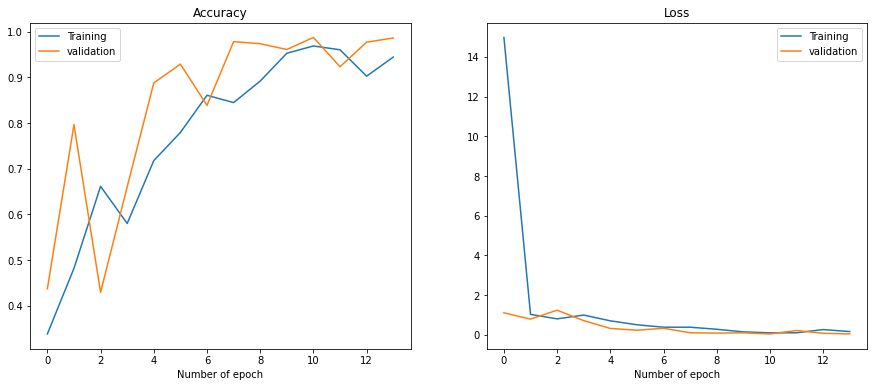

In [16]:
#Graphs to show loss and accuracy along the training

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title('Accuracy')
plt.xlabel('Number of epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title('Loss')
plt.legend()
plt.xlabel('Number of epoch')
plt.show()

Evaluate the model using confusion matrix and classification report

In [18]:
val = val_gen.flow_from_directory('/tmp/rockpaperscissors',
                                  target_size=(224,224),
                                  seed = 123,
                                  class_mode = 'categorical',
                                  batch_size=131,
                                  subset='validation',
                                  shuffle=False)

filenames = val.filenames

pred = model.predict_generator(val, steps = len(filenames))
y_pred = np.argmax(pred, axis=1)

print('\nConfusion Matrix')
print(confusion_matrix(val.classes, y_pred))

print('\nClassification Report')
target_names = ['Paper', 'Rock', 'Scissors']
print(classification_report(val.classes, y_pred, target_names=target_names))

Found 874 images belonging to 3 classes.

Confusion Matrix
[[278   2   4]
 [  1 289   0]
 [  4   0 296]]

Classification Report
              precision    recall  f1-score   support

       Paper       0.98      0.98      0.98       284
        Rock       0.99      1.00      0.99       290
    Scissors       0.99      0.99      0.99       300

    accuracy                           0.99       874
   macro avg       0.99      0.99      0.99       874
weighted avg       0.99      0.99      0.99       874



Predict uploaded data

Saving WhatsApp Image 2021-07-09 at 20.40.34.jpeg to WhatsApp Image 2021-07-09 at 20.40.34.jpeg

the prob of Paper is 0.99995923
the prob of Rock is 2.165812e-05
the prob of Scissor is 1.9047933e-05




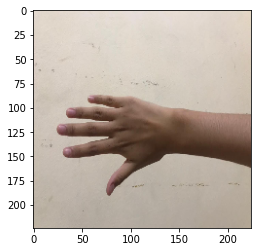

In [19]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  probability = classes[0]

  print('\nthe prob of Paper is', probability[0])
  print('the prob of Rock is', probability[1])
  print('the prob of Scissor is', probability[2])
  print('\n')